In [2]:
import sys
import os

In [3]:
sys.path.append(os.path.abspath('..'))
import libpysal

In [4]:
libpysal.examples.available()

['georgia',
 '__pycache__',
 'tests',
 'newHaven',
 'Polygon_Holes',
 'nat',
 'Polygon',
 '10740',
 'berlin',
 'rio_grande_do_sul',
 'sids2',
 'sacramento2',
 'burkitt',
 'arcgis',
 'calemp',
 'stl',
 'virginia',
 'geodanet',
 'desmith',
 'book',
 'nyc_bikes',
 'Line',
 'south',
 'snow_maps',
 'Point',
 'street_net_pts',
 'guerry',
 '__pycache__',
 'baltim',
 'networks',
 'us_income',
 'taz',
 'columbus',
 'tokyo',
 'mexico',
 '__pycache__',
 'chicago',
 'wmat',
 'juvenile',
 'clearwater']

In [5]:
libpysal.examples.explain('mexico')

{'name': 'mexico',
 'description': 'Decennial per capita incomes of Mexican states 1940-2000',
 'explanation': ['* mexico.csv: attribute data. (n=32, k=13)',
  '* mexico.gal: spatial weights in GAL format.',
  '* mexicojoin.shp: Polygon shapefile. (n=32)',
  'Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.']}

## Weights from GeoDataFrames

In [6]:
import geopandas
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

from libpysal.weights import Queen, Rook, KNN

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


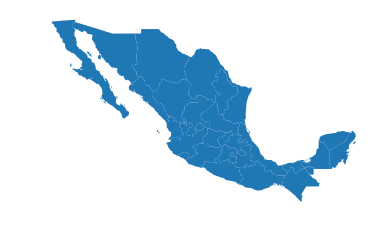

In [8]:
ax = gdf.plot()
ax.set_axis_off()

### Contiguity Weights

The first set of spatial weights we illustrate use notions of contiguity to define neighboring observations. **Rook** neighbors are those states that share an edge on their respective borders:

In [9]:
w_rook = Rook.from_dataframe(gdf)

In [10]:
w_rook.n

32

In [11]:
w_rook.pct_nonzero

12.6953125

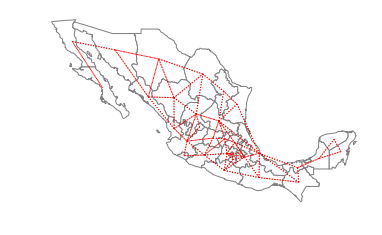

In [12]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [13]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,(POLYGON ((-113.1397171020508 29.0177764892578...
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,(POLYGON ((-111.2061233520508 25.8027763366699...
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,(POLYGON ((-106.6210784912109 21.5653114318847...
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490234375 21.85663986206055, ..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,POLYGON ((-101.8461990356445 22.01176071166992...


In [14]:
w_rook.neighbors[0] # the first location has two neighbors at locations 1 and 22

[1, 22]

In [15]:
gdf['NAME'][[0, 1,22]]

0     Baja California Norte
1       Baja California Sur
22                   Sonora
Name: NAME, dtype: object

So, Baja California Norte has 2 rook neighbors: Baja California Sur and Sonora.

**Queen** neighbors are based on a more inclusive condition that requires only a shared vertex between two states:

In [16]:
w_queen = Queen.from_dataframe(gdf)

In [17]:
w_queen.n == w_rook.n

True

In [18]:
(w_queen.pct_nonzero > w_rook.pct_nonzero) == (w_queen.n == w_rook.n)

True

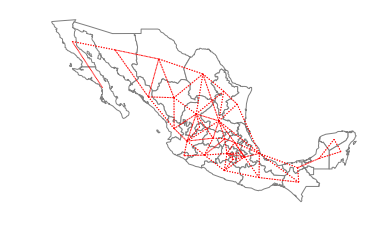

In [19]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_queen.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [20]:
w_queen.histogram

[(1, 1), (2, 6), (3, 6), (4, 6), (5, 5), (6, 2), (7, 3), (8, 2), (9, 1)]

In [21]:
w_rook.histogram

[(1, 1), (2, 6), (3, 7), (4, 7), (5, 3), (6, 4), (7, 3), (8, 1)]

In [22]:
c9 = [idx for idx,c in w_queen.cardinalities.items() if c==9]

In [23]:
gdf['NAME'][c9]

28    San Luis Potosi
Name: NAME, dtype: object

In [24]:
w_rook.neighbors[28]

[5, 6, 7, 27, 29, 30, 31]

In [25]:
w_queen.neighbors[28]

[3, 5, 6, 7, 24, 27, 29, 30, 31]

array([-105.,  -95.,   21.,   26.])

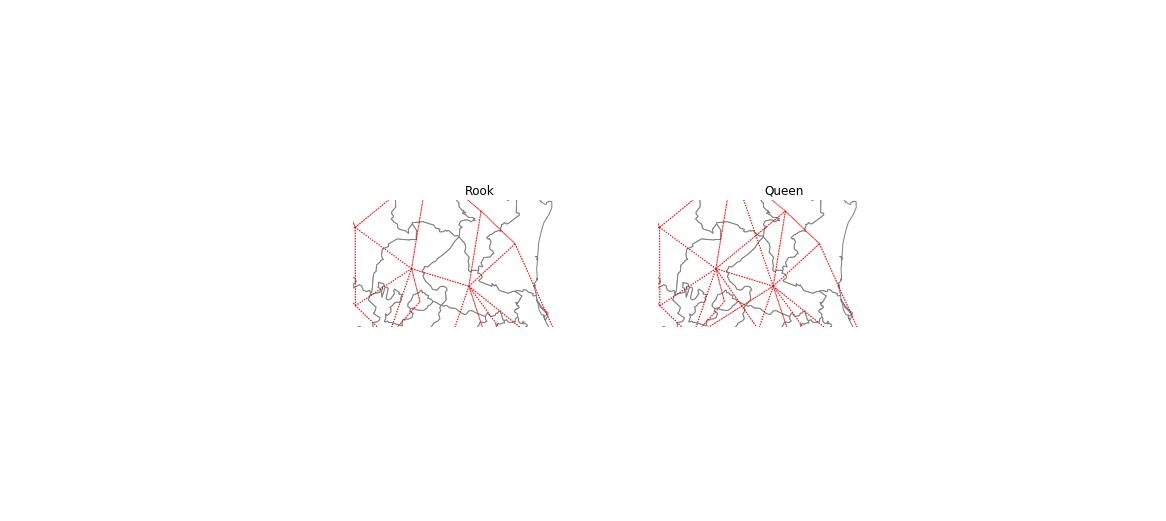

In [26]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
gdf.plot(edgecolor='grey', facecolor='w', ax=ax[0])
w_rook.plot(gdf, ax=ax[0], 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Rook')
ax[0].axis(np.asarray([-105.0, -95.0, 21, 26]))

ax[0].axis('off')
gdf.plot(edgecolor='grey', facecolor='w', ax=ax[1])
w_queen.plot(gdf, ax=ax[1], 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Queen')
ax[1].axis('off')
ax[1].axis(np.asarray([-105.0, -95.0, 21, 26]))

In [27]:
w_knn = KNN.from_dataframe(gdf, k=4)

In [28]:
w_knn.histogram

[(4, 32)]

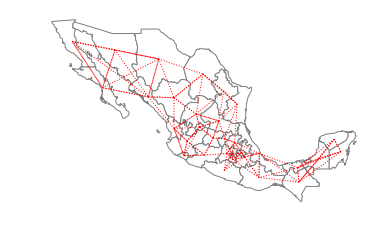

In [29]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

## Weights from shapefiles (without geopandas)

In [30]:
pth = libpysal.examples.get_path("mexicojoin.shp")
from libpysal.weights import Queen, Rook, KNN

In [31]:
w_queen = Queen.from_shapefile(pth)

In [32]:
w_rook = Rook.from_shapefile(pth)

In [33]:
w_knn1 = KNN.from_shapefile(pth)

/home/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 2 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


The warning alerts us to the fact that using a first nearest neighbor criterion to define the neighbors results in a connectivity graph that has more than a single component. In this particular case there are 2 components which can be seen in the following plot:

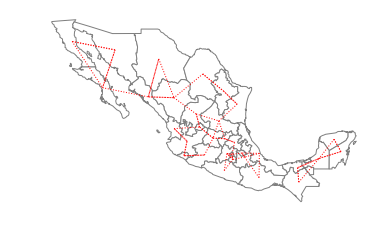

In [34]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn1.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

The two components are separated in the southern part of the country, with the smaller component to the east and the larger component running through the rest of the country to the west. For certain types of spatial analytical methods, it is necessary to have a adjacency structure that consists of a single component. To ensure this for the case of Mexican states, we can increase the number of nearest neighbors to three:

In [35]:
w_knn3 = KNN.from_shapefile(pth,k=3)

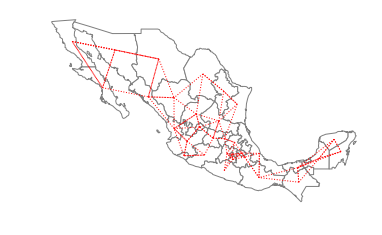

In [36]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn3.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

## Lattice Weights

In [37]:
from libpysal.weights import lat2W

In [38]:
w = lat2W(4,3)

In [39]:
w.n

12

In [40]:
w.pct_nonzero

23.61111111111111

In [41]:
w.neighbors

{0: [3, 1],
 3: [0, 6, 4],
 1: [0, 4, 2],
 4: [1, 3, 7, 5],
 2: [1, 5],
 5: [2, 4, 8],
 6: [3, 9, 7],
 7: [4, 6, 10, 8],
 8: [5, 7, 11],
 9: [6, 10],
 10: [7, 9, 11],
 11: [8, 10]}

## Handling nonplanar geometries

In [42]:
rs = libpysal.examples.get_path('map_RS_BR.shp')

In [43]:
import geopandas as gpd

In [44]:
rs_df = gpd.read_file(rs)
wq = libpysal.weights.Queen.from_dataframe(rs_df)

/home/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:168: UserWarning: There are 29 disconnected observations 
  Island ids: 0, 4, 23, 27, 80, 94, 101, 107, 109, 119, 122, 139, 169, 175, 223, 239, 247, 253, 254, 255, 256, 261, 276, 291, 294, 303, 321, 357, 374
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [45]:
len(wq.islands)

29

In [47]:
wq[0]

{}

In [48]:
wf = libpysal.weights.fuzzy_contiguity(rs_df)

In [49]:
wf.islands

[]

In [50]:
wf[0]

{239: 1.0, 59: 1.0, 152: 1.0, 23: 1.0, 107: 1.0}

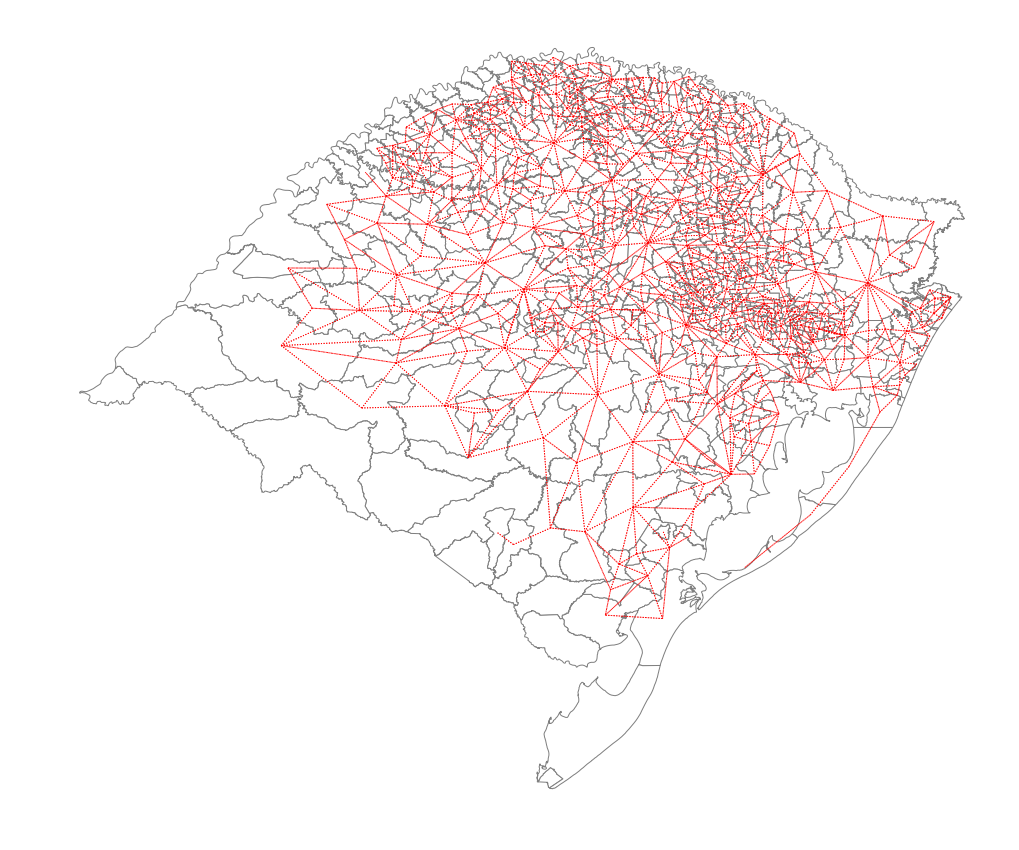

In [58]:
plt.rcParams["figure.figsize"] = (20,15)
ax = rs_df.plot(edgecolor='grey', facecolor='w')
f,ax = wq.plot(rs_df, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))

ax.set_axis_off()

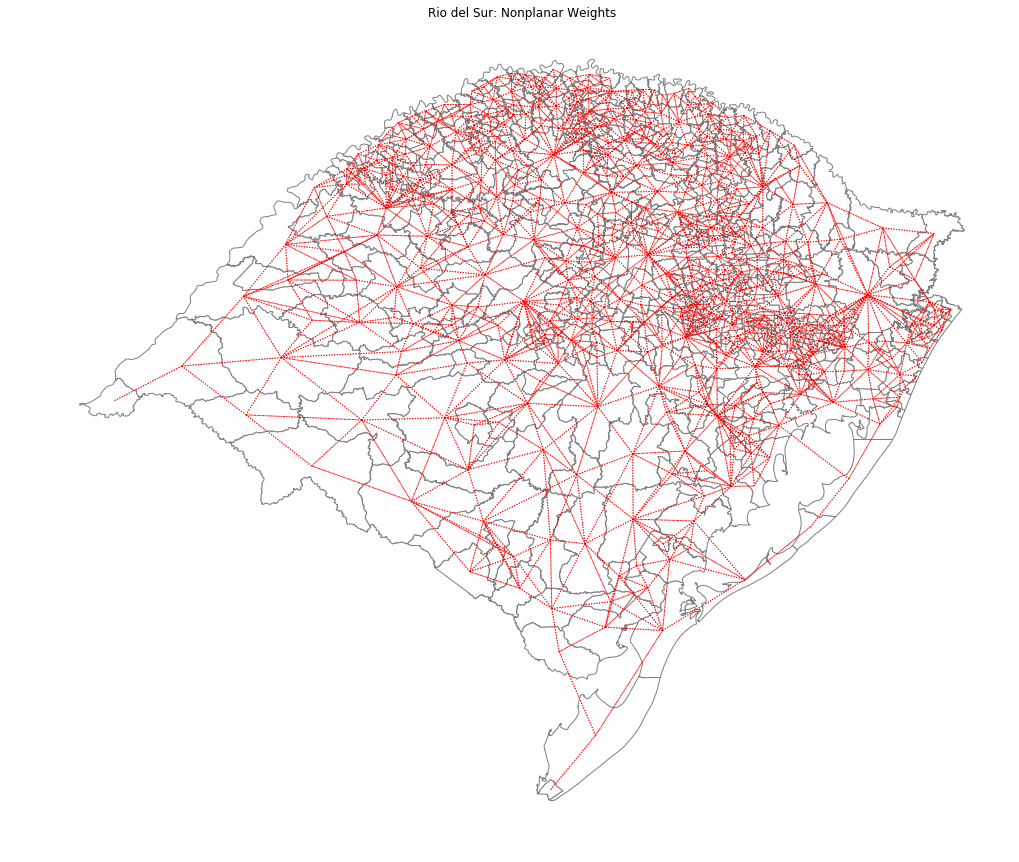

In [59]:

ax = rs_df.plot(edgecolor='grey', facecolor='w')
f,ax = wf.plot(rs_df, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_title('Rio del Sur: Nonplanar Weights')

ax.set_axis_off()